In [4]:
from nuscenes import NuScenes
from nuscenes.prediction import PredictHelper
from nuscenes.eval.prediction.splits import get_prediction_challenge_split

DATAROOT = './data/sets/nuscenes'
nuscenes = NuScenes('v1.0-mini', dataroot='./data/sets/nuscenes')
train_set = get_prediction_challenge_split("mini_train", dataroot=DATAROOT)
helper = PredictHelper(nuscenes)


Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.646 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


# 1. Dataset Initialization
Write the path to the Nuscenes dataset for DATAROOT

In [5]:
from nuscenes import NuScenes

DATAROOT = './data/sets/nuscenes'
nuscenes = NuScenes('v1.0-mini', dataroot=DATAROOT)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.432 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


# 2. Dataset Split
INPUT  : Split string can be chosen from {'mini_train', 'mini_val', 'train', 'val'}

OUTPUT : List of tokens belonging to the split. Format {instance_token}_{sample_token}

{Instance_token} refers to annotation of which object instance  /   {Sample_token} refers to a sample NOT a sample data 

In [6]:
from nuscenes.eval.prediction.splits import get_prediction_challenge_split
train_set = get_prediction_challenge_split("mini_train", dataroot=DATAROOT)
val_set = get_prediction_challenge_split("mini_val", dataroot=DATAROOT)
train_set,val_set



(['bc38961ca0ac4b14ab90e547ba79fbb6_39586f9d59004284a7114a68825e8eec',
  'bc38961ca0ac4b14ab90e547ba79fbb6_356d81f38dd9473ba590f39e266f54e5',
  'bc38961ca0ac4b14ab90e547ba79fbb6_e0845f5322254dafadbbed75aaa07969',
  'bc38961ca0ac4b14ab90e547ba79fbb6_c923fe08b2ff4e27975d2bf30934383b',
  'bc38961ca0ac4b14ab90e547ba79fbb6_f1e3d9d08f044c439ce86a2d6fcca57b',
  'bc38961ca0ac4b14ab90e547ba79fbb6_4f545737bf3347fbbc9af60b0be9a963',
  'bc38961ca0ac4b14ab90e547ba79fbb6_7626dde27d604ac28a0240bdd54eba7a',
  'bc38961ca0ac4b14ab90e547ba79fbb6_be99ffc878b24aca8956bbb4e0f97d0c',
  'bc38961ca0ac4b14ab90e547ba79fbb6_9813c23a5f1448b09bb7910fea9baf20',
  'bc38961ca0ac4b14ab90e547ba79fbb6_023c4df2d451409881d8e6ea82f14704',
  'a60047adc78a4b6895702e86b6d2fe88_39586f9d59004284a7114a68825e8eec',
  'a60047adc78a4b6895702e86b6d2fe88_356d81f38dd9473ba590f39e266f54e5',
  'a60047adc78a4b6895702e86b6d2fe88_e0845f5322254dafadbbed75aaa07969',
  'a60047adc78a4b6895702e86b6d2fe88_c923fe08b2ff4e27975d2bf30934383b',
  'a60

# 3. Get annotations
data of an agent at a specific time

In [7]:
from nuscenes.prediction import PredictHelper
helper = PredictHelper(nuscenes)

instance_token, sample_token = train_set[0].split("_")
annotation = helper.get_sample_annotation(instance_token, sample_token)
annotation

{'token': 'a286c9633fa34da5b978758f348996b0',
 'sample_token': '39586f9d59004284a7114a68825e8eec',
 'instance_token': 'bc38961ca0ac4b14ab90e547ba79fbb6',
 'visibility_token': '4',
 'attribute_tokens': ['cb5118da1ab342aa947717dc53544259'],
 'translation': [392.945, 1148.426, 0.766],
 'size': [1.708, 4.01, 1.631],
 'rotation': [-0.5443682117180475, 0.0, 0.0, 0.8388463804957943],
 'prev': '16140fbf143d4e26a4a7613cbd3aa0e8',
 'next': 'b41e15b89fd44709b439de95dd723617',
 'num_lidar_pts': 0,
 'num_radar_pts': 0,
 'category_name': 'vehicle.car'}

past/future data of an agent ( param in_agent_frame=True means agent's local coordinate )

In [8]:
future_xy_local = helper.get_future_for_agent(instance_token, sample_token, seconds=3, in_agent_frame=True)
future_xy_global = helper.get_future_for_agent(instance_token, sample_token, seconds=3, in_agent_frame=False)
future_xy_local[0]


array([0.01075063, 0.2434942 ])

# 4. Get dynamic data of an agent
velocity(m/s), acceleration(m/s^2), yaw rate(rad/sec)

In [9]:
agent_velocity = helper.get_velocity_for_agent(instance_token, sample_token)
agent_acceleration = helper.get_acceleration_for_agent(instance_token, sample_token)
agent_yaw_rate = helper.get_heading_change_rate_for_agent(instance_token, sample_token)


# 5. Map
geometric_layers : ['polygon', 'line', 'node']

non_geometric_layers : ['drivable_area', 'road_segment', 'road_block', 'lane', 'ped_crossing', 'walkway', 'stop_line', 'carpark_area', 'road_divider', 'lane_divider', 'traffic_light']

In [10]:
from nuscenes.map_expansion.map_api import NuScenesMap
nusc_map = NuScenesMap(map_name='singapore-onenorth', dataroot=DATAROOT)

In [11]:
sample_traffic_light_record = nusc_map.traffic_light[0]
sample_traffic_light_record

{'token': '00590fed-3542-4c20-9927-f822134be5fc',
 'line_token': '5bffb006-bce8-44a4-a466-5580f1d748fd',
 'traffic_light_type': 'VERTICAL',
 'from_road_block_token': '71c79c48-819c-4b17-ad28-2a9e82ba1596',
 'items': [{'color': 'RED',
   'shape': 'CIRCLE',
   'rel_pos': {'tx': 0.0,
    'ty': 0.0,
    'tz': 0.632,
    'rx': 0.0,
    'ry': 0.0,
    'rz': 0.0},
   'to_road_block_tokens': []},
  {'color': 'YELLOW',
   'shape': 'CIRCLE',
   'rel_pos': {'tx': 0.0,
    'ty': 0.0,
    'tz': 0.381,
    'rx': 0.0,
    'ry': 0.0,
    'rz': 0.0},
   'to_road_block_tokens': []},
  {'color': 'GREEN',
   'shape': 'CIRCLE',
   'rel_pos': {'tx': 0.0,
    'ty': 0.0,
    'tz': 0.13,
    'rx': 0.0,
    'ry': 0.0,
    'rz': 0.0},
   'to_road_block_tokens': []},
  {'color': 'GREEN',
   'shape': 'RIGHT',
   'rel_pos': {'tx': 0.0,
    'ty': -0.26,
    'tz': 0.13,
    'rx': 0.0,
    'ry': 0.0,
    'rz': 0.0},
   'to_road_block_tokens': ['bd26d490-8822-469b-ae60-74f6c0c9e1cb']}],
 'pose': {'tx': 369.220733999419

show object info concerning to road network

In [12]:
x = 873
y = 1286
print('Road objects on selected point:', nusc_map.layers_on_point(x, y), '\n')
print('Next road objects:', nusc_map.get_next_roads(x, y))

Road objects on selected point: {'drivable_area': 'c3e28556-b711-4581-9970-b66166fb907d', 'road_segment': '57416e99-8919-4a28-985b-033a16938243', 'road_block': '', 'lane': '', 'ped_crossing': '', 'walkway': '', 'stop_line': '', 'carpark_area': ''} 

Next road objects: {'road_segment': ['3493d68c-5217-4d21-ae1b-3cbf4467dd77', '4b0e50c0-c549-49a2-9077-57a8cba8ab55', '5428b143-6343-4045-ac81-466df3dcc510'], 'road_block': ['5c286ee8-7b4d-4cd8-84bb-7486e77ba827', '8b33213a-692e-4c5f-a69a-efa6836f5316', '9aa7a714-30ba-4892-a276-c033928a8ae2', '9c506cc4-7d14-475d-8063-22a5b9bc257f', 'b7cc94f4-3882-4df2-a9ae-9349925809a1', 'e0c4f027-ea81-40f2-bafc-3fb8e8ab78c3'], 'lane': ['525b6716-a12e-4dd0-8541-91ef672ce39b', '5fdd162d-477d-4bc4-ada3-535d79a9f4b1', '8658217b-87d6-4f8b-96be-35d53100247d', 'b7378bda-dedf-4f97-9d87-b0dd602fdab5', 'bce7caf7-5e33-48d6-b0aa-8b5b641c8ce5', 'f747ce8a-2396-4da3-a8e6-45201ed470d6']}


# 6. Input Representation

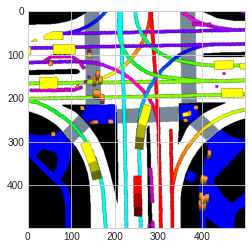

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

from nuscenes.prediction.input_representation.static_layers import StaticLayerRasterizer
from nuscenes.prediction.input_representation.agents import AgentBoxesWithFadedHistory
from nuscenes.prediction.input_representation.interface import InputRepresentation
from nuscenes.prediction.input_representation.combinators import Rasterizer

static_layer_rasterizer = StaticLayerRasterizer(helper)
agent_rasterizer = AgentBoxesWithFadedHistory(helper, seconds_of_history=1)
mtp_input_representation = InputRepresentation(static_layer_rasterizer, agent_rasterizer, Rasterizer())

instance_token_img, sample_token_img = 'bc38961ca0ac4b14ab90e547ba79fbb6', '7626dde27d604ac28a0240bdd54eba7a'
# anns = [ann for ann in nuscenes.sample_annotation if ann['instance_token'] == instance_token_img]
img = mtp_input_representation.make_input_representation(instance_token_img, sample_token_img)

plt.imshow(img)


In [14]:
scene = nuscenes.get('scene', nuscenes.sample[0]['scene_token'])
log = nuscenes.get('log', scene['log_token'])
location = log['location']
scene, log, location


({'token': 'cc8c0bf57f984915a77078b10eb33198',
  'log_token': '7e25a2c8ea1f41c5b0da1e69ecfa71a2',
  'nbr_samples': 39,
  'first_sample_token': 'ca9a282c9e77460f8360f564131a8af5',
  'last_sample_token': 'ed5fc18c31904f96a8f0dbb99ff069c0',
  'name': 'scene-0061',
  'description': 'Parked truck, construction, intersection, turn left, following a van'},
 {'token': '7e25a2c8ea1f41c5b0da1e69ecfa71a2',
  'logfile': 'n015-2018-07-24-11-22-45+0800',
  'vehicle': 'n015',
  'date_captured': '2018-07-24',
  'location': 'singapore-onenorth',
  'map_token': '53992ee3023e5494b90c316c183be829'},
 'singapore-onenorth')

In [15]:
NuScenes('v1.0-mini', dataroot=DATAROOT).sample[6]

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.411 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


{'token': '4f545737bf3347fbbc9af60b0be9a963',
 'timestamp': 1532402930648325,
 'prev': 'f1e3d9d08f044c439ce86a2d6fcca57b',
 'next': '7626dde27d604ac28a0240bdd54eba7a',
 'scene_token': 'cc8c0bf57f984915a77078b10eb33198',
 'data': {'RADAR_FRONT': 'c02402396ad84679823fe41b11f70630',
  'RADAR_FRONT_LEFT': '49624608defb41a3b52461d440f8fa98',
  'RADAR_FRONT_RIGHT': 'e4faa90087a04e3aaf4737f97181df1e',
  'RADAR_BACK_LEFT': '9b3c22c54b02404b8da214b16136d2b4',
  'RADAR_BACK_RIGHT': 'fc66a5110f514276b1b19bb90a048bbd',
  'LIDAR_TOP': 'bba3bbf8fb5b443d91ce478600ac3b49',
  'CAM_FRONT': '33b500c9cc824733a47bfe2c3ea33202',
  'CAM_FRONT_RIGHT': 'e233235caf3c432893ace86d9e808b65',
  'CAM_BACK_RIGHT': '57c0d85cfdae4e0dbb9ad37619ae2888',
  'CAM_BACK': 'e29aa193fc8547e0b6f6ced962e0669d',
  'CAM_BACK_LEFT': '68ce2872db8d454982edca38eefe1540',
  'CAM_FRONT_LEFT': '96d7d28d57c24bccb936bd950d5cdad3'},
 'anns': ['05e0ad1194804f548be544f2267c7e74',
  'f1f57ad4e8824cbb8fcf77fb737e7b76',
  '17e097832cb743b99b66e84

In [16]:
from nuscenes.prediction import PredictHelper
import os

helper = PredictHelper(nuscenes)
dataroot = helper.data.dataroot

instance_token_img, sample_token_img = 'bc38961ca0ac4b14ab90e547ba79fbb6', '7626dde27d604ac28a0240bdd54eba7a'

s= helper.get_future_for_agent(instance_token_img, sample_token_img,seconds=6,in_agent_frame=False, just_xy=False)

json_files = filter(lambda f: "json" in f and "prediction_scenes" not in f,
                    os.listdir(os.path.join(dataroot, "maps")))
maps = {}

for map_file in json_files:
    map_name = str(map_file.split(".")[0])
    maps[map_name] = NuScenesMap(dataroot, map_name=map_name)

s



[{'token': '2c1a8ae13d76498c838a1fb733ff8700',
  'sample_token': 'be99ffc878b24aca8956bbb4e0f97d0c',
  'instance_token': 'bc38961ca0ac4b14ab90e547ba79fbb6',
  'visibility_token': '4',
  'attribute_tokens': ['cb5118da1ab342aa947717dc53544259'],
  'translation': [388.168, 1136.675, 0.991],
  'size': [1.708, 4.01, 1.631],
  'rotation': [-0.5443682117180475, 0.0, 0.0, 0.8388463804957943],
  'prev': 'fe33c018573e4abda3ff8de0566ee800',
  'next': '2064ecd1630a428184fb8715b226bf9b',
  'num_lidar_pts': 35,
  'num_radar_pts': 4,
  'category_name': 'vehicle.car'},
 {'token': '2064ecd1630a428184fb8715b226bf9b',
  'sample_token': '9813c23a5f1448b09bb7910fea9baf20',
  'instance_token': 'bc38961ca0ac4b14ab90e547ba79fbb6',
  'visibility_token': '4',
  'attribute_tokens': ['cb5118da1ab342aa947717dc53544259'],
  'translation': [386.878, 1133.783, 0.991],
  'size': [1.708, 4.01, 1.631],
  'rotation': [-0.5443682117180475, 0.0, 0.0, 0.8388463804957943],
  'prev': '2c1a8ae13d76498c838a1fb733ff8700',
  'nex

In [17]:
s= NuScenes('v1.0-mini', dataroot=DATAROOT).sample[6]
train_set = get_prediction_challenge_split("train", dataroot=DATAROOT)
print(train_set[6])


Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.436 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.
4d87aaf2d82549969f1550607ef46a63_f8e421e9a9d74bc8a23c5ba60e297c51


In [18]:
print(s['anns'])


['05e0ad1194804f548be544f2267c7e74', 'f1f57ad4e8824cbb8fcf77fb737e7b76', '17e097832cb743b99b66e84db5cff1ff', 'e98f7cc6ee24435ba05ddb8ddfc921e1', '86189578deba48e792e687b5e8e6fe12', 'cce69e28c4504554a588cf6efb891c4c', '3be9487bfe3243868102d23891ca8e33', '4161bbc859a64eb2b717f60f8fcb7093', '6de543c5ee2842ccb4257bf880270590', '7919142a9418461b8043894dd134de42', '885db842735944f692e5262b9186c863', 'cd1f67dff4ab4cd5b9dafe6ae403a5f9', '76986518da114edcb1185c1b100d7987', '3c47e2a4feef48acb64e6faa78413c2b', '2816513af68141dfbabc93c82886555d', 'd44651ba144b4baca72633f7fa84eded', '4dccb5c379ec430aacbade5607317df5', '0e7581043c26471197673540e92c9e64', '537e929c60284dba9689cb78c267f918', '8b8fed7cc29c4a959904cce36a289b8d', '1a22b18bef144807a2f4a89d7bfdd489', 'e25b9e7019814d53876ff2697df7a2de', 'b7df9f7090db4fe1b7bb3d02b821155d', 'dd6f0e2fae644fbda53a716789cfa522', '5aed04efcb974ab692e4e5a265dab20d', '1a59783e6dff4c698a0c2ab8cd666cd3', '48f87933c9d34cfe938c6849ef7d0549', 'a1d8de3724924a829b7d39216e

In [19]:
sample = nuscenes.sample[3]

sample_lidar_data = nuscenes.get('sample_data', sample['data']['LIDAR_TOP'])

ego_pose = nuscenes.get('ego_pose', sample_lidar_data['ego_pose_token'])
ego_pose_xy = ego_pose['translation']
ego_pose_xy

[406.7260055966978, 1168.2112865775816, 0.0]

In [20]:
my_scene_token = nuscenes.field2token('scene', 'name', 'scene-0061')[0]
# nuscenes.render_scene(my_scene_token)


  0%|          | 0/1 [00:00<?, ?it/s]

Adding ego poses to map...


100%|██████████| 1/1 [00:01<00:00,  1.75s/it]


Creating plot...


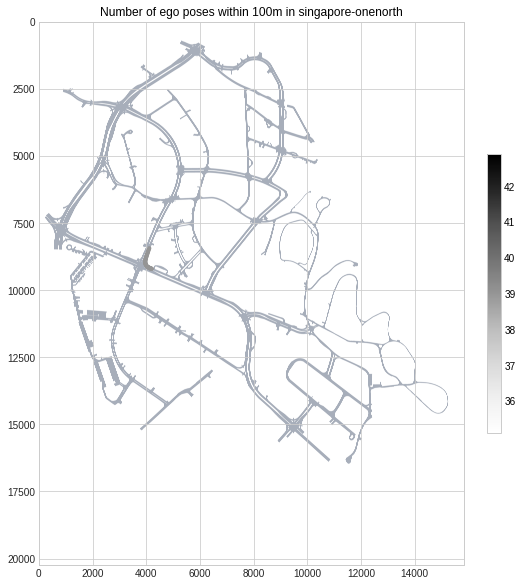

In [21]:
nuscenes.render_egoposes_on_map(log_location='singapore-onenorth')


In [22]:
mini_train = ['scene-0061', 'scene-0553', 'scene-0655', 'scene-0757', 'scene-0796', 'scene-1077', 'scene-1094', 'scene-1100']

mini_val = ['scene-0103', 'scene-0916']

print(nuscenes.log)

[{'token': '7e25a2c8ea1f41c5b0da1e69ecfa71a2', 'logfile': 'n015-2018-07-24-11-22-45+0800', 'vehicle': 'n015', 'date_captured': '2018-07-24', 'location': 'singapore-onenorth', 'map_token': '53992ee3023e5494b90c316c183be829'}, {'token': '53cf9c55dd8644bea67b9f009fc1ee38', 'logfile': 'n008-2018-08-01-15-16-36-0400', 'vehicle': 'n008', 'date_captured': '2018-08-01', 'location': 'boston-seaport', 'map_token': '36092f0b03a857c6a3403e25b4b7aab3'}, {'token': '6f7fe59adf984e55a82571ab4f17e4e2', 'logfile': 'n008-2018-08-27-11-48-51-0400', 'vehicle': 'n008', 'date_captured': '2018-08-27', 'location': 'boston-seaport', 'map_token': '36092f0b03a857c6a3403e25b4b7aab3'}, {'token': '881dd2f8aaec49b681eb54be5bf3b3e2', 'logfile': 'n008-2018-08-28-16-43-51-0400', 'vehicle': 'n008', 'date_captured': '2018-08-28', 'location': 'boston-seaport', 'map_token': '36092f0b03a857c6a3403e25b4b7aab3'}, {'token': '3a43824b84534c98bda1d07548db5817', 'logfile': 'n008-2018-08-30-15-16-55-0400', 'vehicle': 'n008', 'date_

In [23]:
from tqdm import tqdm
from PIL import Image
import numpy as np
log_location='singapore-queenstown'
scene_tokens = mini_train

color_fg = (167, 174, 186)
color_bg = (255, 255, 255)

# Get logs by location.
log_tokens = [log['token'] for log in nuscenes.log if log['location'] == log_location]
# print(log_tokens)
# assert len(log_tokens) > 0, 'Error: This split has 0 scenes for location %s!' % log_location

# Filter scenes.
scene_tokens_location = [e['token'] for e in nuscenes.scene if e['log_token'] in log_tokens]
# print(scene_tokens_location)
# print(len(scene_tokens_location))

map_poses = []
map_mask = None

print('Adding ego poses to map...')
for scene_token in tqdm(scene_tokens_location):
    print(scene_token)
    # Get records from the database.
    scene_record = nuscenes.get('scene', scene_token)
    log_record = nuscenes.get('log', scene_record['log_token'])
    map_record = nuscenes.get('map', log_record['map_token'])
    map_mask = map_record['mask']

    # For each sample in the scene, store the ego pose.
    sample_tokens = nuscenes.field2token('sample', 'scene_token', scene_token)
    for sample_token in sample_tokens:
        sample_record = nuscenes.get('sample', sample_token)

        # Poses are associated with the sample_data. Here we use the lidar sample_data.
        sample_data_record = nuscenes.get('sample_data', sample_record['data']['LIDAR_TOP'])
        pose_record = nuscenes.get('ego_pose', sample_data_record['ego_pose_token'])

        # Calculate the pose on the map and append.
        map_poses.append(np.concatenate(
            map_mask.to_pixel_coords(pose_record['translation'][0], pose_record['translation'][1])))

        # Compute number of close ego poses.
        print('Creating plot...')
        map_poses = np.vstack(map_poses)


        # Monochrome maps.
        # Set the colors for the mask.
        mask = Image.fromarray(map_mask.mask())
        mask = np.array(mask)

        maskr = color_fg[0] * np.ones(np.shape(mask), dtype=np.uint8)
        maskr[mask == 0] = color_bg[0]
        maskg = color_fg[1] * np.ones(np.shape(mask), dtype=np.uint8)
        maskg[mask == 0] = color_bg[1]
        maskb = color_fg[2] * np.ones(np.shape(mask), dtype=np.uint8)
        maskb[mask == 0] = color_bg[2]
        mask = np.concatenate((np.expand_dims(maskr, axis=2),
                                np.expand_dims(maskg, axis=2),
                                np.expand_dims(maskb, axis=2)), axis=2)

        # Plot.
        _, ax = plt.subplots(1, 1, figsize=(10, 10))
        ax.imshow(mask)
        title = 'Number of ego poses within in {}'.format(log_location)
        ax.set_title(title, color='k')
        sc = ax.scatter(map_poses[:, 0], map_poses[:, 1], s=10)
        color_bar = plt.colorbar(sc, fraction=0.025, pad=0.04)
        plt.rcParams['figure.facecolor'] = 'black'
        color_bar_ticklabels = plt.getp(color_bar.ax.axes, 'yticklabels')
        plt.setp(color_bar_ticklabels, color='k')
        plt.rcParams['figure.facecolor'] = 'white'  # Reset for future plots.


  0%|          | 0/2 [00:00<?, ?it/s]

Adding ego poses to map...
c5224b9b454b4ded9b5d2d2634bbda8a
Creating plot...


Map expansion tutorial

In [2]:
import matplotlib.pyplot as plt
import tqdm
import numpy as np

from nuscenes.map_expansion.map_api import NuScenesMap

nusc_map = NuScenesMap(dataroot='./data/sets/nuscenes', map_name='singapore-onenorth')

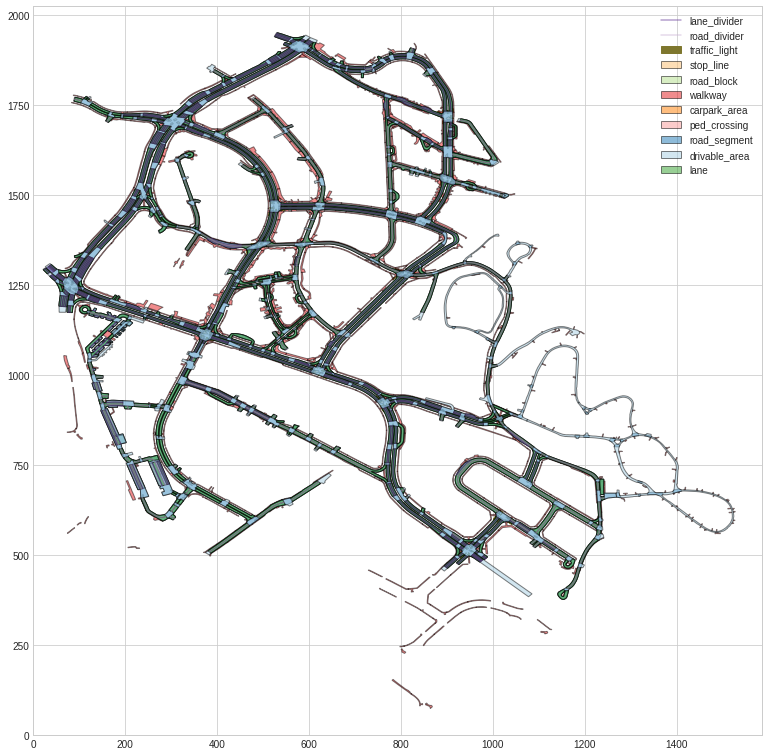

In [6]:
fig, ax = nusc_map.render_layers(nusc_map.non_geometric_layers, figsize=1)

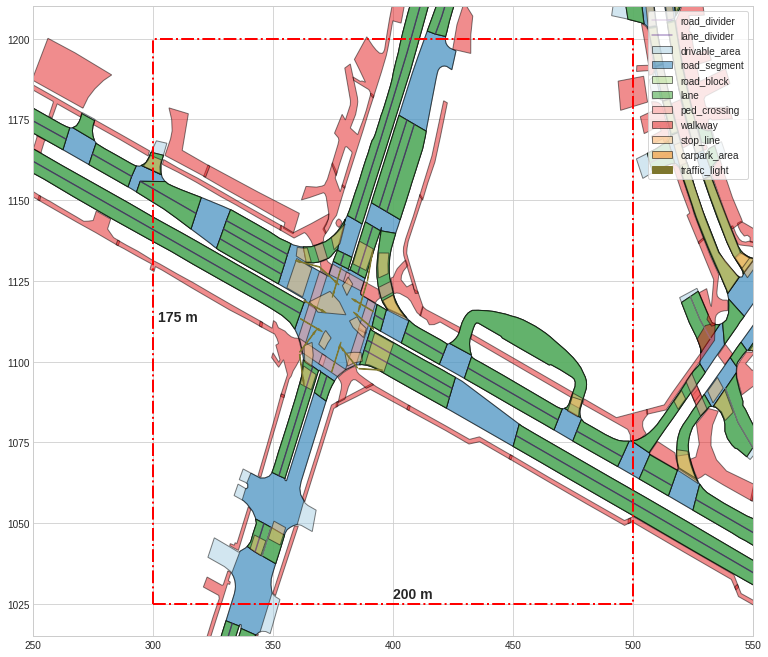

In [13]:
my_patch = (300,1025,500,1200)
fig, ax = nusc_map.render_map_patch(my_patch, nusc_map.non_geometric_layers, figsize=(10,10))

In [11]:
# records_within_patch = nusc_map.get_records_in_patch(my_patch, nusc_map.non_geometric_layers, mode='within')
# records_within_patch

#    point = Point(x, y)
#         records = getattr(self.map_api, layer_name)

#         if layer_name == 'drivable_area':
#             for record in records:
#                 polygons = [self.map_api.extract_polygon(polygon_token) for polygon_token in record['polygon_tokens']]
#                 for polygon in polygons:
#                     if point.within(polygon):
#                         return record['token']
                

ValueError: polygon is not a valid layer